In [70]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
'''
Exercise: Implement the following function, which pads all the images of a batch of examples X with zeros. 
Use np.pad. Note if you want to pad the array "a" of shape $(5,5,5,5,5) with pad = 1 for the 2nd dimension, 
pad = 3 for the 4th dimension and pad = 0 for the rest, 
you would do:

a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = (..,..))
'''

'\nExercise: Implement the following function, which pads all the images of a batch of examples X with zeros. \nUse np.pad. Note if you want to pad the array "a" of shape $(5,5,5,5,5) with pad = 1 for the 2nd dimension, \npad = 3 for the 4th dimension and pad = 0 for the rest, \nyou would do:\n\na = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), \'constant\', constant_values = (..,..))\n'

In [72]:
# GRADED FUNCTION: zero_pad
def zero_pad(x, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    x_pad = np.pad(x,((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant',constant_values =(0, 0))
    return x_pad

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


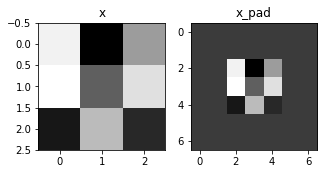

In [73]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[1,1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [74]:
'''3.2 - Single step of convolution
In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit, which:

Takes an input volume
Applies a filter at every position of the input
Outputs another volume (usually of different size)


In a computer vision application, each value in the matrix on the left corresponds to a single pixel value, and 
we convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, 
then summing them up and adding a bias. In this first step of the exercise, you will implement a single step of
convolution, corresponding to applying a filter to just one of the positions to get a single real-valued output.

Later in this notebook, you'll apply this function to multiple positions of the input to implement the full 
convolutional operation.

Exercise: Implement conv_single_step().'''

"3.2 - Single step of convolution\nIn this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit, which:\n\nTakes an input volume\nApplies a filter at every position of the input\nOutputs another volume (usually of different size)\n\n\nIn a computer vision application, each value in the matrix on the left corresponds to a single pixel value, and \nwe convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, \nthen summing them up and adding a bias. In this first step of the exercise, you will implement a single step of\nconvolution, corresponding to applying a filter to just one of the positions to get a single real-valued output.\n\nLater in this notebook, you'll apply this function to multiple positions of the input to implement the full \nconvolutional operation.\n\nExercise: Implement conv_single_step()."

In [75]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """
    # Element-wise product between a_slice and W. Do not add the bias yet.
    s = a_slice_prev * W
    #sum over all entries of the volume s.
    z = np.sum(s)
    #Add bias b to z. Cast b to a float() so that Z results in a scalar value.
    z = float(z+b)
    return z

In [76]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [77]:
'''3.3 - Convolutional Neural Networks - Forward pass
In the forward pass, you will take many filters and convolve them on the input. 
Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

Exercise: Implement the function below to convolve the filters W on an input activation A_prev. 
This function takes as input A_prev, the activations output by the previous layer (for a batch of m inputs), F filters/weights denoted by W, and a bias vector denoted by b, where each filter has its own (single) bias. Finally you also have access to the hyperparameters dictionary which contains the stride and the padding.

Hint:

To select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (5,5,3)), you would do:
a_slice_prev = a_prev[0:2,0:2,:]
This will be useful when you will define a_slice_prev below, using the start/end indexes you will define.
To define a_slice you will need to first define its corners vert_start, vert_end, horiz_start and horiz_end. 
This figure may be helpful for you to find how each of the corner can be defined using h, w, f and s in the code below.


Reminder: The formulas relating the output shape of the convolution to the input shape is:$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$$$ n_C = \text{number of filters used in the convolution}$$

For this exercise, we won't worry about vectorization, and will just implement everything with for-loops.'''

'3.3 - Convolutional Neural Networks - Forward pass\nIn the forward pass, you will take many filters and convolve them on the input. \nEach \'convolution\' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:\n\nExercise: Implement the function below to convolve the filters W on an input activation A_prev. \nThis function takes as input A_prev, the activations output by the previous layer (for a batch of m inputs), F filters/weights denoted by W, and a bias vector denoted by b, where each filter has its own (single) bias. Finally you also have access to the hyperparameters dictionary which contains the stride and the padding.\n\nHint:\n\nTo select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (5,5,3)), you would do:\na_slice_prev = a_prev[0:2,0:2,:]\nThis will be useful when you will define a_slice_prev below, using the start/end indexes you will define.\nTo define a_slice you will need to first define its corners vert_start, vert_end, 

In [78]:

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    (m, n_H_prev, n_W_prev, n_C_prev) = np.shape(A_prev)
    (f, f, n_C_prev, n_C) = np.shape(W)
    
    stride = hparameters['stride']
    pad = hparameters['pad']
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    Z = np.zeros((m, n_H, n_W, n_C))
    A_prev_pad = zero_pad(A_prev, pad)
    for i in range(m):                                  # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i,:,:,:]                # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end,horiz_start:horiz_end,:]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev,W[:,:,:,c], b[:,:,:,c])
             
   
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache
    
    

In [79]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

Z's mean = 0.048995203528855794
Z[3,2,1] = [-0.61490741 -6.7439236  -2.55153897  1.75698377  3.56208902  0.53036437
  5.18531798  8.75898442]
cache_conv[0][1][2][3] = [-0.20075807  0.18656139  0.41005165]


In [80]:
'''
4 - Pooling layer
The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are:

Max-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.

Average-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.

			
These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the fxf window you would compute a max or average over.

4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.

Exercise: Implement the forward pass of the pooling layer. Follow the hints in the comments below.

Reminder: As there's no padding, the formulas binding the output shape of the pooling to the input shape is:$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$$$ n_C = n_{C_{prev}}$$
'''


"\n4 - Pooling layer\nThe pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are:\n\nMax-pooling layer: slides an ($f, f$) window over the input and stores the max value of the window in the output.\n\nAverage-pooling layer: slides an ($f, f$) window over the input and stores the average value of the window in the output.\n\n\t\t\t\nThese pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the fxf window you would compute a max or average over.\n\n4.1 - Forward Pooling\nNow, you are going to implement MAX-POOL and AVG-POOL, in the same function.\n\nExercise: Implement the forward pass of the pooling layer. Follow the hints in the comments below.\n\nReminder: As there's no padding, the formulas binding the output shap

In [81]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [82]:
np.random.seed(1)
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)


mode = max
A = [[[[1.74481176 0.86540763 1.13376944]]]


 [[[1.13162939 1.51981682 2.18557541]]]]

mode = average
A = [[[[ 0.02105773 -0.20328806 -0.40389855]]]


 [[[-0.22154621  0.51716526  0.48155844]]]]


In [85]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = None
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = None
    
    # Retrieve information from "hparameters"
    stride = None
    pad = None
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = None
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = None                           
    dW = None
    db = None

    # Pad A_prev and dA_prev
    A_prev_pad = None
    dA_prev_pad = None
    
    for i in range(None):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = None
        da_prev_pad = None
        
        for h in range(None):                   # loop over vertical axis of the output volume
            for w in range(None):               # loop over horizontal axis of the output volume
                for c in range(None):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = None
                    vert_end = None
                    horiz_start = None
                    horiz_end = None
                    
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = None

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += None
                    dW[:,:,:,c] += None
                    db[:,:,:,c] += None
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = None
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [86]:
np.random.seed(1)
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

TypeError: cannot unpack non-iterable NoneType object

In [87]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """
    
    ### START CODE HERE ### (≈1 line)
    mask = (x == np.max(x))
    ### END CODE HERE ###
    
    return mask

In [88]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]
